<a href="https://colab.research.google.com/github/JoDeMiro/Statistics/blob/main/Python_Statistics_04_Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

```
# Bemutatkozás
```

```
     Istvan Pintye
     ---------------------------------------------------------
     MTA SZTAKI Computer and Automation Research Institute
                Hungarian Academy of Sciences,
     Laboratory of Parallel and Distributed Systems
     Postal    : P.O.Box 63. H-1518 Budapest, Hungary
     Location  : 1132 Budapest Victor Hugo u. 18-22. Hungary
     Phone/Fax : +36 1 329-78-64 (secretary)
     Mobile    : +36 30 822-5188
     E-mail    : pintye@sztaki.hu
     ---------------------------------------------------------
```



```
https://github.com/JoDeMiro
```



# Bemutató

### Az Óbudai Egyetem Doktori Iskola Dr. Prof. Takács Márta Statisztikai hipotézis vizsgálatok című tantárgyához

Készítette:
Pintye István egyetemi hallgató

## Bevezetés a Neurális hállózatokhoz

### Mi a Neurális hálózat?

A neurális hálózatokat képzeljük el a testünkben működő ideghálózatok működéséhez hasonlóan. Anélkül, hogy túl mélyen belemennék a biológiai hasonlatba, szükségesnek tartom megemlíteni ezt a megközelítést.

A továbbiakban azonban inkább a számítástechnika tudományi megközelítést fogom bemutatni. A gépi tanuláson belül a neuráis hálózat egyfajta közelítő függvény amely $x$ bemeneti változó(k) és $y$ kimeneti változó közötti kapcsolatot írja le, illetve a bemeneti változó(k) és y változó közötti kapcsolatot próbálja meg leírni úgy, hogy közben a fűggvéyn kimenete és a valós értékek közötti hibát próbálja meg csökkenteni.

Ez így elsőre talán túl sok ezért ezt az egészet lépésekre fogom bemutatni és a fogalmakat tisztázni.

A bemutató végén az egész elgondolást Python programnyelven fogom implementálni.

A felhasznált irodalom és internetes címjegyzék a dokumentum végén található.

### Mi a Neruális hálózat?

A hálózat - helyesen mesterséges neurális hálózat - egymáshoz kapcsolt részegységek csoportja amelyet szokás három különálló részre bontani, névszerint bemeneti, rejtett és kimeneti (input, hidden, output) rétegere.

Az alábbi ábrán egy oylan neurális hálózat sematikus felépítését láthatjuk, ahol a bemeneti réteg három változóból áll. Két köztes vagy rejtett réteget tartalmaz egyenként 4-4 neuronnal és a kimeneteli rétegen egy változó van.

<img src="https://github.com/JoDeMiro/Statistics/raw/main/images/neural_network_schema.jpeg">

*Ábra 1. Neurális hálózat egyszerűsített sematikus ábrája <a href="http://cs231n.github.io/neural-networks-1">[Forrás]</a>*

## Perceptron

A neurális hálózatban az egyes rejtett rétegek számítási egységei a perceptronok vagy más néven neuronok. Ezek a számítási egységék - a fenti ábrán az egyes fehér pontok - olyan függvények amelyek veszik a bemeneti változók lineáris kombinációját, majd ezt az értéket egy nem lineáris átviteli fügvénynek adják át és így kapjuk meg a neuron kimenetét, amely azutnán a következő réteg bemenete lesz.

## Átviteli vagy transzformációs függvény

Ha az átviteli függvény például $$ \sigma(x) = \frac{1}{1 + e ^{x}} $$ akkor a kimenetlünk egy 0 és 1 közé eső érték lesz.

## Neuronunk tulajdonképpen

$$ \hat{y} = \sigma(b + \sum_{i=1}^{n} w_i x_i)$$


## A neuron biológia analógiájához visszatérve

<img src="https://github.com/JoDeMiro/Statistics/raw/main/images/neural_network_neuron_explanation.jpeg">

<img src="https://github.com/JoDeMiro/Statistics/raw/main/images/neural_network_perceptron_explanation.jpeg">


*Ábra 2. A neuron sematikus ábrája <a href="http://cs231n.github.io/neural-networks-1">[Forrás]</a>*



In [ ]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import ipywidgets as widgets

# from ipywidgets import IntSlider
# from ipywidgets import HTML
# from ipywidgets import interact, interactive, fixed, interact_manual
from ipywidgets import interact

In [ ]:

class Neuron(object):

  def foreward(self, input, weights, bias):
    """ szemléltetés """
    sum     = np.sum(input * weights) + bias
    output = 1.0 / (1.0 + math.exp(-sum))

    return output
  

In [ ]:
neuron = Neuron()

In [ ]:
x = np.arange(-6, 6, 0.1)
y = np.zeros(x.shape)

for i, v in enumerate(x):
  y[i] = neuron.foreward(v, 3, 1)


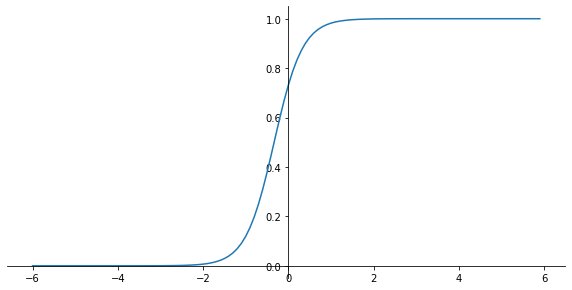

In [ ]:
plt.subplots(figsize=(10, 5))

plt.plot(x,y)

ax = plt.gca()
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')

## Ugyanez kicsit másképpen

In [ ]:
class Neuron(object):
    
    def __init__(self,x,y):
        self.x = x
        self.y = y
  
    def sigmoid(self,x):
        """
        Computes the Sigmoid activation of `x`.
        """
        return 1 / (1 + np.exp(-x))
    
    def feedforward(self, w1, b1):
        """
        Performs a forward pass through the model.
        """

        self.W1 = w1
        self.b1 = b1
        
        o = np.dot(self.x, self.W1) + self.b1
        self.output = self.sigmoid(o)

        return(self.output)
      
    def plot(self):
      """
      Show the input output.
      """

      fig = plt.gcf()
      fig.set_size_inches(18, 10)
      label = 'w = {0},     b = {1} '.format(self.W1, self.b1)
      plt.plot(x,self.output, label = label)
      plt.legend()

      ax = plt.gca()
      ax.spines['top'].set_color('none')
      ax.spines['bottom'].set_position('zero')
      ax.spines['left'].set_position('zero')
      
      ax.spines['right'].set_color('none')
      ax.set_ylim((0.0, 1.0))



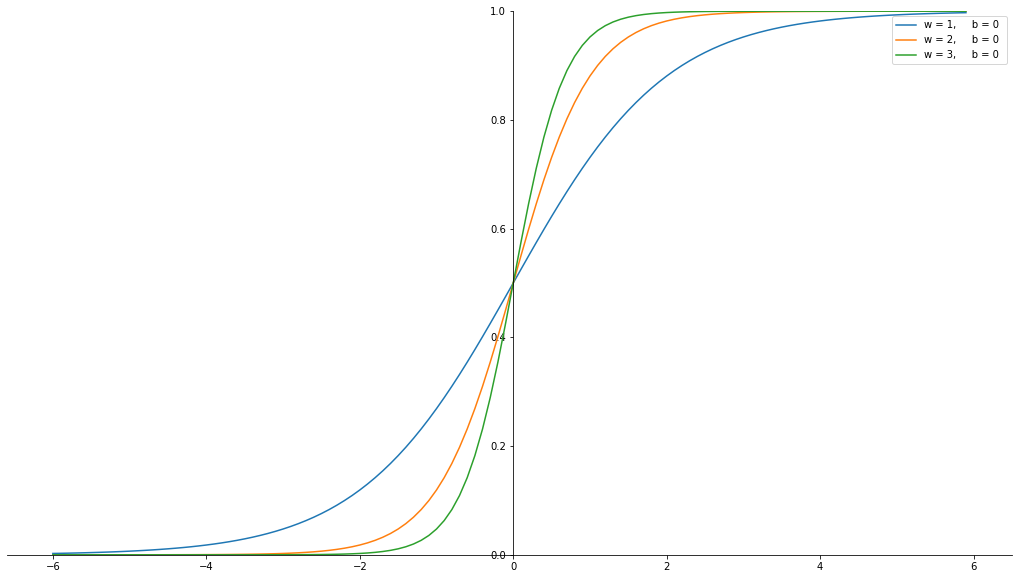

In [ ]:
x = np.arange(-6, 6, 0.1)
y = np.zeros(x.shape)

neuron = Neuron(x, y)

neuron.feedforward(1,0)

neuron.plot()

neuron.feedforward(2,0)

neuron.plot()

neuron.feedforward(3,0)

neuron.plot()

In [ ]:
def playground(weight = 0.2, bias = 1.0):

  neuron.feedforward(1.0,0)
  neuron.plot()
  neuron.feedforward(2.0,0)
  neuron.plot()
  neuron.feedforward(3.0,0)
  neuron.plot()

  neuron.feedforward(weight, bias)

  neuron.plot()

  return 0

In [ ]:
f = interact(playground, weight = (-9.0, 9.0, 0.1), bias = (-10, 10, 0.1));

interactive(children=(FloatSlider(value=0.2, description='weight', max=9.0, min=-9.0), FloatSlider(value=1.0, …

## Fontos látni,
hogy itt csupán az átviteli függvény - esetünkben sigmoid - működését szerettem volna bemutatni. Pontosabban azt, hogy milyen összefüggés van a **weight** $w$ és a **bias** $b$ mint paraméterek, és a függvény kimenetele között.

Fontos megértni, hogy nem csak egy hanem több változó értékeét is figyelembe mindegyik a hozzá tartozó súllyal

<img src="https://github.com/JoDeMiro/Statistics/raw/main/images/perceptron_schema_simplified.jpeg">

*Ábra 3. A neuron más néven perceptron sematikus ábrája <a href="http://cs231n.github.io/neural-networks-1">[Forrás]</a>*

## Az aktivációs függvények jelentősége
Az aktivációs függvény lényeg, hogy valmailyne nem linearitást viegyen a neurális hálózatokba, amely lehetővé teszi, hogy neurális hálózato olyan x - y kapcsolatokat irjon le amelyenk lineárisan nem írhatóakle. Ilyen nem lineáris kapcsolatokkal tetszőleges összetett függvényket is elő tudunk állítani.

## A leggyakrabban alkalmazott aktivációs függvények
1- **Sigmoid**. A valós számokat "összenyomja" egy 0 és 1 közötti intervallumba.

2- **Tanh**. Hiberbolikus Tangens függvény $tanh(x)=2\sigma(2x)-1$ a valós számokat egy  [-1, 1] közötti tartományba alakítja. Gyakorlatilag egy skálázott **Sigmoid**

3- **ReLU**. The Rectified Linear Unit az utóbbi idők egyik kedvelt aktivációs függvénye $f(x)=max(0,x)$.


# A neurális háló tanítása.
Az egyszerűség kedvéért tegyük fel, hogy a neurális háló amin a tanulást fogom bemutatni az alábbi módon néz ki {3 bemeneti változó, 1 köztes réteg 4 neuronnal, és 1 kimenet} lásd az alábbi ábrán.

<img src="https://github.com/JoDeMiro/Statistics/raw/main/images/neural_network_feed_foreward_schema.jpeg">

Láthattuk, hogy a súlyok, weights $\mathbf{W}$ és egy konstans, a biases $\mathbf{b}$ azok a változók amelyek hatással vannak a neurális háló kimenetelére, a  $\hat{y}$ értékére. Ezért a neuráis hálók alapvető feladata, hogy megtalálja azokat a $\mathbf{w}$ és $\mathbf{b}$ értékeket, amelyek mellett a függvény álltal X változókból előállított értékek és $y$ valódi értéke közötti különbség (eltérés) a legkisebb.

Azt az iterációs folyamatot amelyben a 'legjobb' $\mathbf{w}$ és $b$ értékeket keressük a bemeneti adatok tükrében nevezzükk a neruális háló tanításának.

Ez a folyamat két lépésből áll.

## Feed-forward computation

A Feed-foreward lépés ismételt mátrix szorzások sorozatát jelenti az aktivációs függvények kombinálásáával. A mi példánkban ez az azt jelenti, hogy a különböző változókat vekotorokká, a súlyokat mátrixokká alakítjuk. Ezért a bemenetünk [3x1] vektor. A köztes réteg súlyai (W1) egy [4x3] mátrix és a konstans (b1) egy [4x1] vektor. A köztes rétegen minden neruonnak meg vannak a maga súlyai (a W1 mátrix sorai). A mátrix vector szorzás `np.dot(W1,x)` kiszámolja az összes neuron bemenetét. Az utolsó réteghez (kimeneti réteg) tartozó W2 vektor [1x4] és b2 [1x1]. Az adatok vagy értékek, az neurális háló kimenete ebből a három mátrix szorzásból áll össze, miközben a köztes rétegen elhelyezkedő neuronok még az aktivációs függvény végrehajtásával formálják tovább az eredményt:


<img src="https://github.com/JoDeMiro/Statistics/raw/main/images/neural_network_feed_foreward_step_schema.jpeg">

A tanulás során a feladatunk megkeresni a W1,W2,b1,b2 paraméterket.

> Megjegyzés: minden egyes réteg között művelet egy mátrix szorzás amit egy konstanssal való összeadás követ és ez az érték lesz az aktivációs függvény bemenet.



## Költség függvény $J(W)$

Miután végrehajtottuk a fenti műveletet a neurális hálónknak lesz egy kimenete egy érték.

Amiről eddig még nem esett szó, hogy itt $\mathbf{X[x_1, x_2, ..., x_n]}, \mathbf{y}$ értékpárokról van szó.

Ahogy korábban már említettem a feladatunk az, hogy találjunk egy olyan függvényt, amely 'jól' leírja az $\mathbf{X[x_1, x_2, ..., x_n]}, \mathbf{y}$ érték párok közötti kapcsolatot.

Annak érdekében, hogy ezt szemléltetni tudjam vegyünk egy egyszerű példát.
Van 10 darab értékpárunk amit egy $f(y) = (0.17 + 1.14 * x)$ függvényel becsülünk. A hiba a valódi $y$ érték és az az $f(y)$ függvény által becsült érték közötti különbség - illetven annak négyzetének összege. 

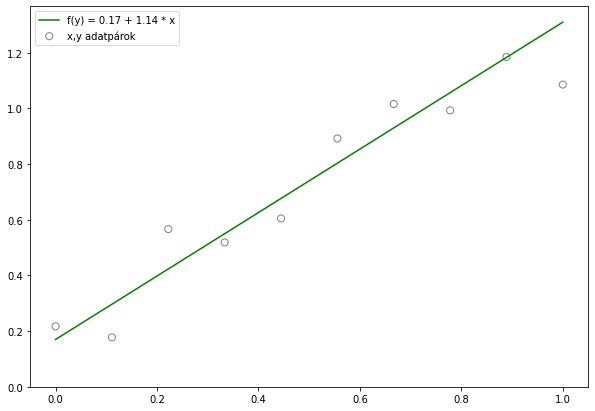

In [ ]:
def create_data(func, sample_size, std):
  x = np.linspace(0, 1, sample_size).reshape(-1, 1)
  t = func(x) + np.random.normal(scale = std, size = x.shape)
  return x, t

def linear_function(x):
  return (0.17 + 1.14 * x)

size = 10
sigma = 0.1
np.random.seed(1234)

x, y = create_data(linear_function, size, sigma)
x_predict = np.linspace(0, 1, 100).reshape(-1, 1)
y_true = linear_function(x_predict)
y_estimated = linear_function(x)

fig = plt.gcf()
fig.set_size_inches(10, 7)
plt.scatter(x, y, facecolor = 'none', edgecolor = 'grey', s = 50, label = 'x,y adatpárok')
plt.plot(x_predict, y_true, c = 'g', label = 'f(y) = 0.17 + 1.14 * x')
plt.ylim(bottom = 0.0)
plt.legend()
plt.show()

In [ ]:
df = pd.DataFrame(x, columns = ['x'])
df['y'] = y
df['f(y)'] = y_estimated
df['error'] = (y - y_estimated)
df['squared_error'] = df['error'] * df['error']

sum_of_squeares_error = df['squared_error'].sum()

print('\nSum of Squares Error (SSE): {:0.7f}'.format(sum_of_squeares_error), '\n')

df


Sum of Squares Error (SSE): 0.1127132 



x         y      f(y)     error  squared_error
0  0.000000  0.217144  0.170000  0.047144       0.002223
1  0.111111  0.177569  0.296667 -0.119098       0.014184
2  0.222222  0.566604  0.423333  0.143271       0.020526
3  0.333333  0.518735  0.550000 -0.031265       0.000978
4  0.444444  0.604608  0.676667 -0.072059       0.005192
5  0.555556  0.892050  0.803333  0.088716       0.007871
6  0.666667  1.015959  0.930000  0.085959       0.007389
7  0.777778  0.993014  1.056667 -0.063652       0.004052
8  0.888889  1.184903  1.183333  0.001570       0.000002
9  1.000000  1.085732  1.310000 -0.224268       0.050296

A **költség függvény** pontosan fenti esetben pontosan ez az érték. A feladatunk tehát az, hogy úgy válaszuk meg a neruális háló súlyainak értékét, hogy ez az érték a lehető legkissebb legyen.

Ha $\mathcal{L}(\hat{y}^{(i)},y^{(i)})$ a költsége (vagy vesztesége) minden $i$ az $m$ elemű adathalmazunkban, $i=1,2,\cdots,m$, akkor az teljes veszteség, vagy hiba $J(W)$ az összes adatra:

$$J(W)=\frac{1}{m}\sum_{i=1}^m \mathcal{L}(\hat{y}^{(i)},y^{(i)})$$

$W=[W^{(1)}, W^{(2)},\cdots, W^{(L)}]$, ahol $W^{(j)}$ a $j$ rétegen elhelyezkedő súlyok mátrixa.


## Mean Squared Error Loss
Mean squared error loss (magyarul átlagos négyzetes hiba) akkor használunk ha reggressziós problémát akarunk megoldani vagyis $y$ értékét a valós számok halmazán értelmezzük.

$$J(W)=\frac{1}{m}\sum_{i=1}^m \left( y^{(i)} - \hat{y}^{(i)} \right)^2$$


## Cross Entropy Loss
Ezt a költségfüggvényt klasszifikációs, vagy osztályozási problémákhoz használjuk, olyan esetekben amikor a kimeneti változó $y$ valamilyen kategória értékű változó például {igen, nem}, {férfi, nő}, {beteg, egészséges}, {kevés, elég, sok}. Természetesen ezeket azeket az értékeket számszerűsítenünk kell. Bináris változóknál ezéért ezeket az értékeket {0, 1} értékre szokták kódolni. Kicsivel bonyolultabb a helyzet ha kettőnél több értéket vehet fel a változó. Ez esetben az úgynevezett One-Hot Encodign módszert szoktákalkalmazni (erre most nem térek ki)

A két értékű változó esetében a Cross entropy értéke egy 0 és 1 közé eső értéket vehet fel, amit felfoghatunk úgy is mint az egyik, vagy másik csoporthoz való tartozás valószínűsége.

$$J(W)=-\frac{1}{m}\sum_{i=1}^m \left[ y^{(i)}\log(\hat{y}^{(i)}) + (1-y^{(i)})\log(1-\hat{y}^{(i)})\right]$$
Ha a változóban az osztályok száma $K>2$ (pl. több értékű osztályozásnál), akkor minden egyes osztály esetén kiszámoljuk az adott osztályhoz való tartozás valószínűségét:

$$J(W)=-\frac{1}{m}\sum_{i=1}^m \sum_{c=1}^K y^{(i)}_c\log(\hat{y}^{(i)}_c) + (1-y^{(i)}_c)\log(1-\hat{y}^{(i)}_c)$$

## Backpropagation

Tehát a feladatunk az, hogy találjuk meg azokat a súlyokat és konstansokat, amelyek minimalizálják a költségfüggvényünket:

$$W^* = \underset{W}{\arg\min}\ J(W)$$

Miután megmértük az elétérést a valós és a függvényünk álltal becsült értékek között, tehát a hibát, szükséges ennek a hibának a mértékét figyelmbe venni és eszerint módosítanunk a súllyokat, annak érdekében, hogy csökkentsük a hibát. De hogyan módosítsuk a súlyokat, és legfőképpen mi alapján?

Annak érdekében, hogy megtaláljuk milyen irányba és mértékben kell módosítanunk az egyes súlyokat elöször is vennünk kell a költségfüggvényünk deriváltját minden egyes súlyra egyenként. Ha megvannak a gradiensek, akkor ennek alapján tudjuk módosítani az egyes súlyokat. Ezt a módszert hívják gradiens csökkentő (angolul gradient descent) algoritmusnak.

<img src="https://github.com/JoDeMiro/Statistics/raw/main/images/neural_network_backpropagation_example.jpeg">

## Gradient Descent
Gradient descent algoritmus a következő képen működik:

1. Véletlenszerűen inicializálja a súlyokat $\sim N(0,\sigma^2)$ eloszlás szerint.
2. A következő lépéseket ismétli:
 - minden egyes adatpárra, kiszámolja a gradienst, $\frac{\partial J(\mathbf{W})}{\partial \mathbf{W}}$
 - módosítja a súlyokat, $W = W-\eta \frac{\partial J(W)}{\partial W}$

3. Visszaadja a módosított súlyokat

<img src="https://github.com/JoDeMiro/Statistics/raw/main/images/neural_network_gradient_descent.jpeg">

*Ábra 4. A költségfüggvény két paraméterrel <a href="https://stackoverflow.com/questions/39340429/what-is-the-meaning-of-iterations-of-neural-network-gradient-descent-steps-epo/48012097">[Forrás]</a>*



Mivel a gradiens descent algoritmus minden egyes adatpáron elvégzi a számítást és azután módosítja a súlyokat, ezért ez az eljárás hosszú időt is igénybe vehet igen ha az adathalmazunk igen nagy, vagy neruális elég kellően összetett.

Ezért szokás használni a Stochastic Gradient Descent eljárást, amely a teljes adathalmaz helyet egyetlen adatra (adaton) végzi el a hiba és a gradiens számítást, és ezután módosítja a súlyokat. Ez az eljárás gyorsabb ugyanakkor meg van a hátulütője is.



## Stochastic Gradient Descent
Stochastic Gradient descent algoritmus a következő képen működik:

1. Véletlenszerűen inicializálja a súlyokat $\sim N(0,\sigma^2)$ eloszlás szerint.
2. A következő lépéseket ismétli:
 - válasszon ki az adathalmazbon egyetlen elemet $i$
 - erre az adatra számolja ki a gradienst, $\frac{\partial J_i(\mathbf{W})}{\partial \mathbf{W}}$
 - módosítja a súlyokat, $W = W-\eta \frac{\partial J(W)}{\partial W}$

3. Visszaadja a módosított súlyokat



## Mini-Batch Stochastic Gradient Descent

Habár a stochastic gradient descent nagy mértékben csökkenti a számitási igényt, nagy hátránya hogy véletlenszerűen választja ki az adatokat, ezért nagyon néha nagy ugrásokat tesz a súlyok modosításában és az új súlyok az új adatokra már nem biztos, hogy ugyan olyan jó, vagy jobb eredményt eredményeznek. Ezért ahelyett, hogy a teljes adathalmazon vagy egy egy véletlenszerűen kiválasztot adaton végeznénk el a számításokat inkább kisebb adatszeleteket választunk ki a teljes adathalmazból és ezen végezzük el a számításokat. Ez a módszer egyesíti mindkét fent említett számítási módszer előnyeit és kiküszöböli azok hátrányait.

1. Véletlenszerűen inicializálja a súlyokat $\sim N(0,\sigma^2)$ eloszlás szerint.
2. A következő lépéseket ismétli:
 - válasszon ki az adathalmazbon egy kisebb $n$ elemszámú halmazt $B$
 - ezekre az adatokra számolja ki a gradienst, $\frac{\partial J_i(\mathbf{W})}{\partial \mathbf{W}}$
 - módosítja a súlyokat, $W = W-\eta \frac{\partial J(W)}{\partial W}$

3. Visszaadja a módosított súlyokat





## A tanulási ráta (learning rate) szerepe a Gradient Descent algoritmusban

A gradiens descent módszerben az egyik paraméter, amelyet a tanulás és az iterációk során változatlanul hagyunk a tanulási ráta. Az angol terminológiában Learning Rate $\eta$.

Ez az érték kontrollálja annak a mértékét, hogy egy egy iteráció során milyen mértékben módosítjuk a súlyokat. Ez az érték nagyban befolyásolja azt, hogy milyen gyorsan találjuk meg az optimális súlyokat illetve, hogy milyen gyorsan tudjuk csökkenteni a költség függvényt. Ennek ellenére a nagyobb learning rate nem feltétlenül okoz gyorsabb tanulást, sőt könnyen lehet, hogy nem találjuk meg vele az optimális súly értékeket. A kisebb learning rate segítségével kisebb lépésekben módosítjuk a súlyokat és haladukaz optimális súlyok megtalálása felé, viszont ez a folyamat több iterációt igényel ezért tovább is tart.

A jelenség kiküszöbölésére számos módszer létezik ( csak említés szintjén ADAM - Adaptive Moment Estimation ) amelyekre most nem térek ki részletesen.

<img src="https://github.com/JoDeMiro/Statistics/raw/main/images/neural_network_learningrate.jpeg">

*Ábra 5. Tanulási ráta különböző értékekkel <a href="https://www.jeremyjordan.me/nn-learning-rate/">[Forrás]</a>*

## A túlillesztés problémája

Ahogyan arról már korábban szó esett a neurális hálónak bemenet kimenet adatpárokon tanítjuk. Tehát adott, ismert az adott bemenethez tartozó kimenet. Ezeknek az értékpároknak a segítségével próbáljuk leírni azt a függvényt, amely jól általánosítható módon írja le az adott bemenet kimenet párok közötti kapcsolatokat. Mivel a kapcsolat jellege nem ismert, ezt a neruális hálóra és gépi tanulásra bízzuk.

De továbbra is kérdés marad, hogy az így előállitott függvény (vagy modell) mennyre valid, mennyire általánosítható, milyen mértékben lesz érvényes az olyan adatokra, amelyek a tanítás időpontjában még nem voltak ismertek.

Ezért előállhat az a probléma, hogy bár a tanulás során a fűggvényünk jól, szinte tökéletesen, vagy tökéletesen leírja a bemenet kimeneti változó közötti kapcsolatot, új korábban nem látott adatok esetében téves eredményekre vezet. Ez az úgynevezett túlillesztés, vagy túltanítás (angolul Over Fitting) problémája.

A probléma kezelésének egyik alapvető módszere, hogy az adathalmazunkat, amelyben mind a bemeneti változó, mint a kimeneti változó értéke ismert egy tanuló és egy úgynevezett teszt, vagy validáló részre bontjuk. A tanuló részt használjuk a tanulásra, a teszt, vagy validáló részen pedig azt mérjük, hogy modellünk mennyire teljesít jól a ezen a validáló részen. A teljesít jól kifejezést azt jelenti, hogy a modellünk által becsült érték és a valós érték közötti hiba mértéke, milyen mértékben tér el a teszt mintán mért hiba értékétől. Ha úgyanis a kettő nagy mértékben elkezd távolódni egymástól - és ezt már a tanulás során is monitorozhatjuk - akkor valószínűleg túltanítottuk a modellt. Az így előállított modelből levonható becslések már nem lesznek általánosíthatóak vagy érvények, illetve kevésbé lesznek érvényesek mint magukon a tanuló adatokon.

<img src="https://github.com/JoDeMiro/Statistics/raw/main/images/neural_network_early_stopping.jpeg">

*Ábra 6. Tanuló és Teszt adathalmazra bontott adatokon végzett tanulásnál a tanulás egyes ciklusaiban, iterációiban is figyelemmel kísérhetjük a két adathalmazon elért hiba mértékét. Ez az érték minnél kisebb annál jobb, de előfordulhat, hogy a tanulás egy pontjától a teszt adatokon mért hiba mértéke elkezd növekedni, miközben a tanuló adatokon mért hiba mértéke tovább csökken. Ezen a ponton érdemes megállítani a tanulást <a href="https://mc.ai/why-early-stopping-works-as-regularization/">[Forrás]</a>*

## Python implementáció

In [ ]:
import numpy as np
import pandas as pd
import altair as alt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles, make_moons, make_classification
from sklearn.preprocessing import normalize

In [ ]:
class NeuralNetwork:
    """
    Implements a 2-layer neural network from scratch.
    """
    
    def __init__(self,x,y,n_hidden_units=10,learning_rate=0.01,reg_lambda=0):
        self.x = x
        self.y = y
        self.y_hat = np.zeros(y.shape)
        self.n_hidden_units = n_hidden_units
        self.W1 = np.random.randn(x.shape[1],n_hidden_units)
        self.W2 = np.random.randn(n_hidden_units,1)
        self.b1 = np.zeros((1,n_hidden_units))
        self.b2 = np.zeros((1,1))
        self.learning_rate = learning_rate
        self.epsilon = 1e-4
        self.reg_lambda = reg_lambda
        self.cost_history = []
        
          
    def sigmoid(self,x):
        """
        Computes the Sigmoid activation of `x`.
        """
        return 1 / (1 + np.exp(-x))
    
    
    def sigmoid_prime(self,x):
        """
        Computes the derivative of Sigmoid function for `x`.
        """
        return x * (1 - x)

    
    def feedforward(self):
        """
        Performs a forward pass through the model.
        """
        
        z1 = np.dot(self.x,self.W1) + self.b1
        self.a1 = self.sigmoid(z1)
        z2 = np.dot(self.a1,self.W2) + self.b2
        self.y_hat  = self.sigmoid(z2)


    def cross_entropy(self):
        """
        Computes the loss of the model with l2 regularization.
        """
        regularization = self.reg_lambda * (np.sum(np.square(self.W1)) + np.sum(np.square(self.W2)))
        loss = -np.mean(self.y * np.log(self.y_hat + self.epsilon) + (1 - self.y) * np.log(1 - self.y_hat + self.epsilon)) + regularization
        return loss


    def backprop(self):
        """
        Performs a backpropagation and updates the weights.
        """
        delta_2 = self.y_hat - self.y
        dW2 = np.dot(self.a1.T,delta_2) + self.reg_lambda * self.W2
        db2 = delta_2
        z2_delta = np.dot(delta_2,self.W2.T)
        delta_1 = z2_delta * self.sigmoid_prime(self.a1)
        dW1 = np.dot(self.x.T,delta_1) + self.reg_lambda * self.W1
        db1 = delta_1
    
        self.W2 = self.W2 - self.learning_rate * dW2
        self.b2 = self.b2 - self.learning_rate * np.sum(db2,axis=0)
        self.W1 = self.W1 - self.learning_rate * dW1
        self.b1 = self.b1 - self.learning_rate * np.sum(db1,axis=0)

        
    def train(self):
        """
        Starts training the model.
        """
        self.feedforward()
        loss = self.cross_entropy()
        self.cost_history.append(loss)
        self.backprop()
        
    def predict(self,data):
        """
        Computes the predictions on the `data`.
        """
        self.x = data
        self.feedforward()
        return self.y_hat
    
    
    def plot_cost(self):
        
        """
        Plots the cost vs iterations
        """
        xx = np.arange(n_iterations)
        source = pd.DataFrame({'x':xx, 'y':self.cost_history})
        chart = alt.Chart(source).mark_line().encode(
            alt.X("x",title="Iterations"),
            alt.Y("y",title="Cost")
        )
        return chart
    
    
    def plot_decision_boundary(self,x,y):
        """
        Plots the data along with decision boundary.
        """
    
        orig = pd.DataFrame({"x1":x[:,0].ravel(), "x2": x[:,1],"y":y.ravel()})
        ch_orig = alt.Chart(orig).mark_point().encode(
            alt.X("x1"),
            alt.Y("x2"),
            alt.Color("y:O",scale=alt.Scale(range=["red","blue"]),legend=None)
        ).properties(
            title="Original Data"
        )
        h = 0.04
        x_min, x_max = x[:, 0].min(), x[:, 0].max()
        y_min, y_max = x[:, 1].min(), x[:, 1].max()
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                                 np.arange(y_min, y_max, h))
        zz = np.c_[xx.ravel(),yy.ravel()]
        predictions = self.predict(zz)
        converted_predictions = np.asarray([1 if label > .5 else 0 for label in predictions])

        source = pd.DataFrame({"x":xx.ravel(),"y":yy.ravel(),"z":converted_predictions.ravel()})
        alt.data_transformers.disable_max_rows()
        decision_boundary = alt.Chart(source).mark_point(size=100,filled=True).encode(
            alt.X("x",title="x1"),
            alt.Y("y",title="x2"),
            alt.Color("z:O",scale=alt.Scale(range=['#eb726a','#6ab1eb']))
        #     alt.Opacity("z:Q",scale=alt.Scale(range=[0.1,1]))
        ).properties(
            title="Decision Boundary"
        )

        return ch_orig | alt.layer(decision_boundary,ch_orig).resolve_scale(color='independent')


    
    def run(self):
        
        """
        Starts the neural network.
        """
        for i in range(1,n_iterations + 1):
            self.train()
            if i % 100 == 0:
                print("Iteration: {}".format(i))
                loss = self.cross_entropy()
                print("loss: {}".format(loss))
        cost = np.asarray(self.cost_history)
        print("Hidden Units = {}, Regularization Lambda = {}, Learning Rate = {}".format(self.n_hidden_units,self.reg_lambda,self.learning_rate))

## Az eredmények értelmezése

Néhány különböző beállítással fogom kipróbálni a neurális háloztot. Egyszer a regularizási értékét $\lambda$ fogom változtani és azt vizsgálom meg, hogy ez milyen hatással van az eredményre.

A $\lambda$ értékének növelésével csökkenthető a neurális háló összetettsége és ezzel próbálom megelőzni a túlillesztés problémáját.

Minden ilyen elvégzett tanítás után meg fogom vizsgálni a tanulási görbét - vagyis a hiba mértékét az egyes iterációk függvényében.

In [ ]:

# Number of training examples
n_samples = 200

# Number of hidden units in the hidden layer
n_hidden_units = 60

# Generate training examples
x,y = make_classification(n_samples=n_samples,n_features=2, n_redundant=0, n_informative=2,random_state=76)

# Normalize the features
x_normalized = normalize(x)

y = y.reshape(n_samples,1)

# Number of iterations
n_iterations = 500

# Create a neural network with given parameters including x, y, hidden units, learning rate and regularization lambda
nn = NeuralNetwork(x_normalized,y,n_hidden_units,0.03,0)

# Run the neural network
nn.run()

Iteration: 100
loss: 0.3249015858587924
Iteration: 200
loss: 0.2899134884864603
Iteration: 300
loss: 0.26443855683297424
Iteration: 400
loss: 0.2502360946572233
Iteration: 500
loss: 0.24321814142839718
Hidden Units = 60, Regularization Lambda = 0, Learning Rate = 0.03


In [ ]:
nn.plot_cost()

alt.Chart(...)

In [ ]:
nn.plot_decision_boundary(x,y)

alt.HConcatChart(...)

In [ ]:
nn = NeuralNetwork(x_normalized,y,n_hidden_units,0.03,0.03)

nn.run()

Iteration: 100
loss: 5.840769781581014
Iteration: 200
loss: 6.38748248939676
Iteration: 300
loss: 7.356623858853204
Iteration: 400
loss: 8.181506490399407
Iteration: 500
loss: 8.709955326920905
Hidden Units = 60, Regularization Lambda = 0.03, Learning Rate = 0.03


In [ ]:
nn.plot_cost()

alt.Chart(...)

In [ ]:
nn.plot_decision_boundary(x,y)

alt.HConcatChart(...)

In [ ]:
nn = NeuralNetwork(x_normalized,y,n_hidden_units,0.03,0.06)

nn.run()

Iteration: 100
loss: 9.51881831270652
Iteration: 200
loss: 10.299049903470236
Iteration: 300
loss: 11.436597475927243
Iteration: 400
loss: 12.330153037733682
Iteration: 500
loss: 12.813599243685518
Hidden Units = 60, Regularization Lambda = 0.06, Learning Rate = 0.03


In [ ]:
nn.plot_cost()

alt.Chart(...)

In [ ]:
nn.plot_decision_boundary(x,y)

alt.HConcatChart(...)

In [ ]:
nn = NeuralNetwork(x_normalized,y,n_hidden_units,0.03,0.4)

nn.run()

Iteration: 100
loss: 21.48640844783218
Iteration: 200
loss: 17.319508464688898
Iteration: 300
loss: 16.359430390942723
Iteration: 400
loss: 15.989800160633711
Iteration: 500
loss: 15.774546236193148
Hidden Units = 60, Regularization Lambda = 0.4, Learning Rate = 0.03


In [ ]:
nn.plot_cost()

alt.Chart(...)

In [ ]:
nn.plot_decision_boundary(x,y)

alt.HConcatChart(...)

## Összefoglalás

Alábbi dokumentumot és programot azért készítettem, hogy segítségével jobban megérthető legyen a neurális hálózatok működési elve.

## Felhasznált irodalom és internetes címjegyzék

Stanford - Spring 2021<br>
https://cs231n.github.io/neural-networks-1/

Stanford - Spring 2021 CS231n: Convolutional Neural Networks for Visual Recognition.<br>
http://cs231n.stanford.edu/


An overview of gradient descent optimization algorithms
<br>
https://ruder.io/optimizing-gradient-descent/

Gentle Introduction to the Adam Optimization Algorithm for Deep Learning<br>
https://machinelearningmastery.com/adam-optimization-algorithm-for-deep-learning/